# Notebook Environment Setup

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configuring-your-Python-Environment" data-toc-modified-id="Configuring-your-Python-Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configuring your Python Environment</a></span><ul class="toc-item"><li><span><a href="#Python-3.6-or-Later" data-toc-modified-id="Python-3.6-or-Later-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Python 3.6 or Later</a></span></li><li><span><a href="#Creating-a-virtual-environment" data-toc-modified-id="Creating-a-virtual-environment-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating a virtual environment</a></span></li><li><span><a href="#Using-Requirements.txt" data-toc-modified-id="Using-Requirements.txt-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Using Requirements.txt</a></span></li><li><span><a href="#Installing-in-a-Conda-Environment" data-toc-modified-id="Installing-in-a-Conda-Environment-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Installing in a Conda Environment</a></span></li><li><span><a href="#Installing-with---user-option" data-toc-modified-id="Installing-with---user-option-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Installing with --user option</a></span></li><li><span><a href="#Install-Packages-from-this-Notebook" data-toc-modified-id="Install-Packages-from-this-Notebook-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Install Packages from this Notebook</a></span></li></ul></li><li><span><a href="#Creating-your-config.json" data-toc-modified-id="Creating-your-config.json-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating your <code>config.json</code></a></span></li><li><span><a href="#msticpyconfig.yaml-Configuration-File" data-toc-modified-id="msticpyconfig.yaml-Configuration-File-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>msticpyconfig.yaml</code> Configuration File</a></span><ul class="toc-item"><li><span><a href="#Threat-Intelligence-Provider-Setup" data-toc-modified-id="Threat-Intelligence-Provider-Setup-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Threat Intelligence Provider Setup</a></span></li><li><span><a href="#Display-existing-msticpyconfig.yaml" data-toc-modified-id="Display-existing-msticpyconfig.yaml-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Display existing <code>msticpyconfig.yaml</code></a></span></li><li><span><a href="#Create-a-new--`msticpyconfig.yaml" data-toc-modified-id="Create-a-new--`msticpyconfig.yaml-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Create a new  `msticpyconfig.yaml</a></span></li></ul></li></ul></div>

## Configuring your Python Environment
### Python 3.6 or Later
If you are running in Jupyterhub environment such as Azure Notebooks, Python is already installed. When using any of the sample notebooks or copies of them you only need to ensure that the Python 3.6 (or later) kernel is selected.

If you are running the notebooks locally will you need to install Python 3.6 or later. The Ananconda distribution is a good starting point since it comes with many required packages already installed.

### Creating a virtual environment
If you are running these notebooks locally, it is a good idea to create a clean virtual python environment, before installing any of the packages . This will prevent installed packages conflicting with versions that you may need for other applications.

For standard python use the `virtualenv` command. For Conda use the `conda env` command. In both cases be sure to activate the environment before running jupyter using `activate {my_env_name}`.


### Using Requirements.txt
In **Azure Notebooks** you can configure "Add a requirements.txt" to the current project. See [this notebook](https://github.com/Azure/Azure-Sentinel-Notebooks/HowTos/AzureNotebooks-ConfigurePythonVersion.ipynb) for details.

If running in another environment you can install most of the required packages by downloading `requirements.txt` from the [Azure Sentinel Github](https://github.com/Azure/Azure-Sentinel-Notebooks/Notebooks/requirements.txt).

In a standard environment, you can simply run

```
pip install -r requirements.txt [--user]
```
to install the requirements or run the "Install Packages from this Notebook" cell below.

In [84]:
# Run this cell to view requirements.txt
%pfile requirements.txt

Object `requirements.txt` not found.


### Installing in a Conda Environment
Although you can use pip inside a conda environment it is usually better to try to install conda packages whenever possible.

```
activate {my_env_name}
conda config --append channels conda-forge
conda install package1 package2
```

See [Managing packages](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-pkgs.html) in Anaconda.

For packages that are not available as conda packages use pip from with a Conda prompt/shell to install the remaining packages.

### Installing with --user option
If you are using a shared installation of Python (i.e. one installed by the administrator) you will need to add the `--user` option to your `pip install` commands. E.g.

```
pip install pkg_name --user --upgrade
```

This will avoid permission errors by installing into your user folder.

### Install Packages from this Notebook
The first time this cell runs for a new Azure Notebooks project or other Python environment it will take several minutes to download and install the packages. In subsequent runs it should run quickly and confirm that package dependencies are already installed. Unless you want to upgrade the packages you can feel free to skip execution of the next cell.

If you see any import failures (```ImportError```) in the notebooks, please re-run this notebook and answer 'y' when prompted, then re-run the cell where the import failure occurred.

Note you may see some warnings about incompatibility with certain packages. This should not affect the functionality of this notebook but you may need to upgrade the packages producing the warnings to a more recent version.

In [ ]:
import sys
import warnings

warnings.filterwarnings("ignore",category=DeprecationWarning)

MIN_REQ_PYTHON = (3,6)
if sys.version_info < MIN_REQ_PYTHON:
    print('Check the Kernel->Change Kernel menu and ensure that Python 3.6')
    print('or later is selected as the active kernel.')
    sys.exit("Python %s.%s or later is required.\n" % MIN_REQ_PYTHON)

# Package Installs - try to avoid if they are already installed
try:
    import msticpy.sectools as sectools
    import Kqlmagic
    from dns import reversename, resolver
    from ipwhois import IPWhois
    import folium
    
    print('If you answer "n" this cell will exit with an error in order to avoid the pip install calls,')
    print('This error can safely be ignored.')
    resp = input('msticpy and Kqlmagic packages are already loaded. Do you want to re-install? (y/n)')
    if resp.strip().lower() != 'y':
        sys.exit('pip install aborted - you may skip this error and continue.')
    else:
        print('After installation has completed, restart the current kernel and run '
              'the notebook again skipping this cell.')
except ImportError:
    pass

print('\nPlease wait. Installing required packages. This may take a few minutes...')
!pip install --user -r requirements.txt 

print('To ensure that the latest versions of the installed libraries '
      'are used, please restart the current kernel and run '
      'the notebook again skipping this cell.')

## Creating your `config.json`
If you need to create or modify your config.json you can run the following cell.

You will need the subscription and workspace IDs for your Azure Sentinel Workspace. These can be found here in the Azure Sentinel portal as shown below.

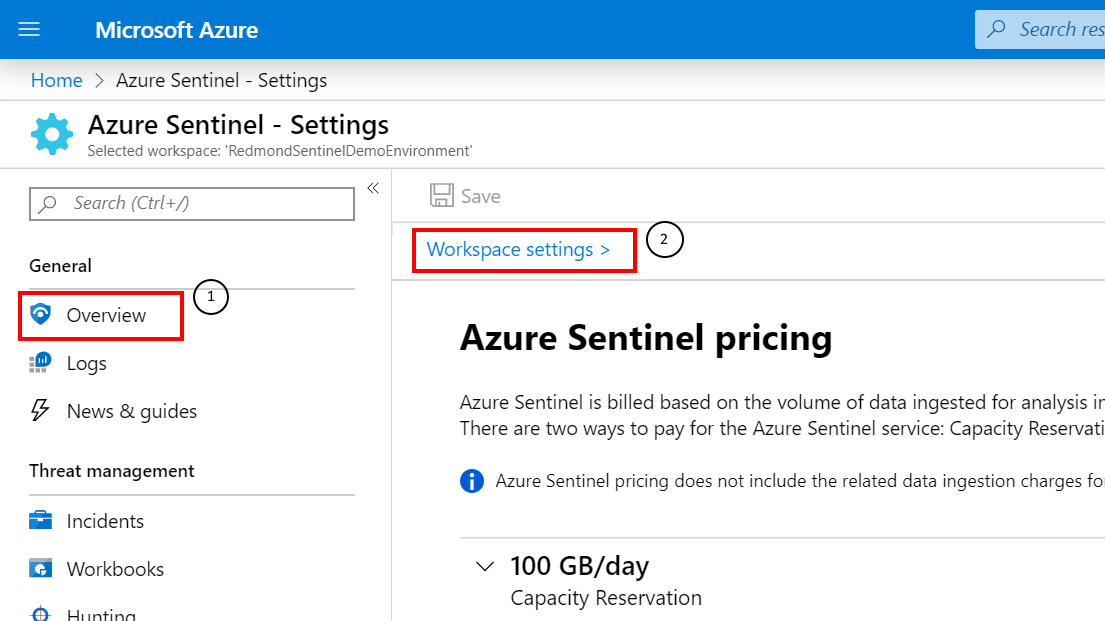

Copy the subscription and workspace IDs:
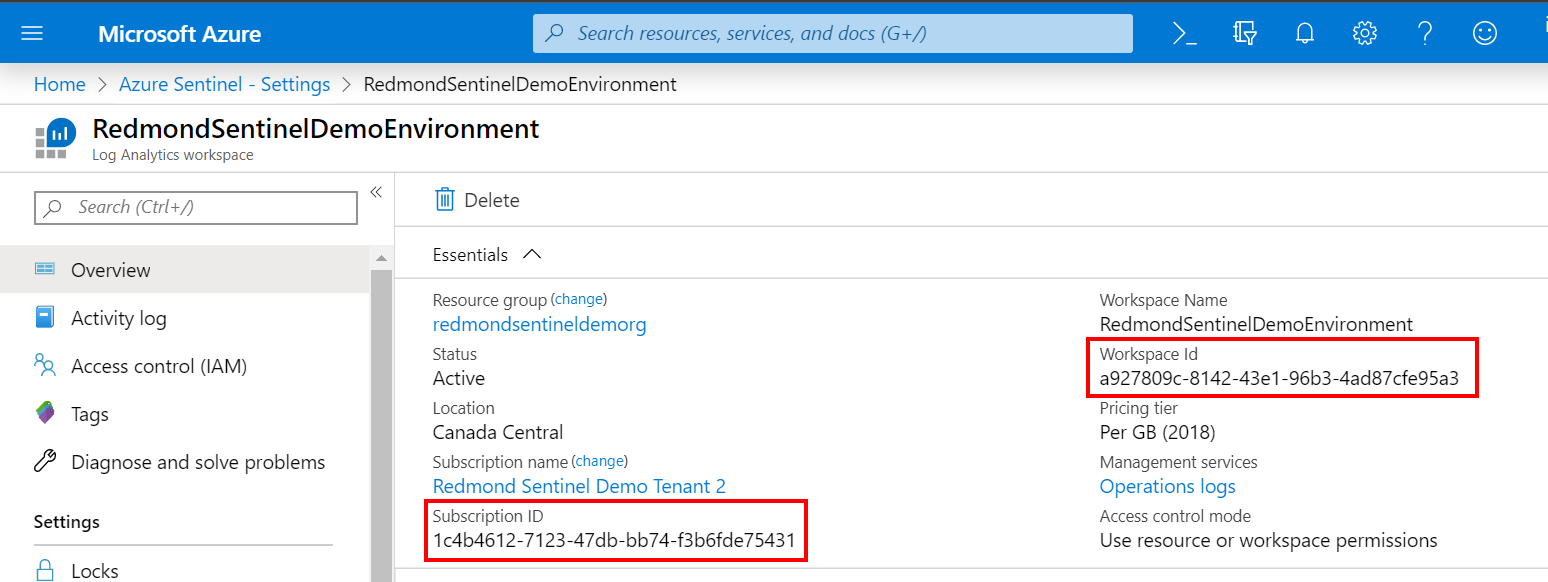

In [85]:
import requests
import json
import ipywidgets as widgets
from pathlib import Path
from datetime import datetime

config_dict = {}

def get_tenant_for_subscription(sub_id):
    aad_url = f"https://management.azure.com/subscriptions/{sub_id}?api-version=2016-01-01"

    resp = requests.get(aad_url)
    if resp.status_code == 401:
        hdr_list = resp.headers["WWW-Authenticate"].split(",")
        hdr_dict = {item.split("=")[0].strip(): item.split("=")[1].strip() for item in hdr_list}
        return hdr_dict["Bearer authorization_uri"].strip("\"").split("/")[3]
    else:
        return None
        

def save_config_json(file_path, tenant_id, subscription_id, workspace_id):
    if Path(file_path).exists():
        bk_file = (
            str(Path(file_path))
            + ".bak"
            + datetime.now().isoformat(timespec="seconds").replace(":", "-")
        )
        print(f"Exising config found. Saving current config.json to {bk_file}")
        Path(file_path).rename(bk_file)
        
    print(f"TenantID found: {tenant_id}")
    config_dict["tenant_id"] = tenant_id
    config_dict["subscription_id"] = subscription_id
    config_dict["workspace_id"] = workspace_id
    
    with open(file_path, "w") as fp:
        json.dump(config_dict, fp, indent=2)
    print(f"Settings saved config to {file_path}")

def save_config(b):
    save_config_json(
        file_path=input_path.value,
        tenant_id=get_tenant_for_subscription(input_sub_id.value),
        subscription_id=input_sub_id.value,
        workspace_id=input_ws_id.value,
    )


DEFAULT_CONFIG = "./config.json"
WIDGET_DEFAULTS = {'layout': widgets.Layout(width='95%'),
                   'style': {'description_width': 'initial'}}
input_path = widgets.Text(description="Path to config.json",
                    value=DEFAULT_CONFIG,
                    **WIDGET_DEFAULTS)
input_sub_id = widgets.Text(description="Azure Sentinel Subscription ID",
                    placeholder="for example, ef28a760-8c61-41d7-8167-5c8e5d91268b",
                    **WIDGET_DEFAULTS)
input_ws_id = widgets.Text(description="Azure Sentinel Workspace ID",
                    placeholder="for example, ef28a760-8c61-41d7-8167-5c8e5d91268b",
                    **WIDGET_DEFAULTS)

if Path(DEFAULT_CONFIG).exists():
    with open(DEFAULT_CONFIG, "r") as fp:
        config_dict = json.load(fp)
    input_sub_id.value = config_dict["subscription_id"]
    input_ws_id.value = config_dict["workspace_id"]

save_button = widgets.Button(description="Save config.json file")
save_button.on_click(save_config)

display(widgets.VBox([input_path, input_sub_id, input_ws_id, save_button]))



## `msticpyconfig.yaml` Configuration File
Before you can use the msticpy TILookup class you need to configure your TI provider settings.

You can configure primary and secondary TI providers and any required parameters in the `msticpyconfig.yaml` file. This file is read from the current directory or you can set an environment variable (`MSTICPYCONFIG`) pointing to its location.
For more details on msticpy configuration see the [msticpy documentation](https://msticpy.readthedocs.io/en/latest/msticpyconfig.html).

### Threat Intelligence Provider Setup
For more information on the msticpy Threat Intel lookup class see the [documentation here](https://msticpy.readthedocs.io/en/latest/TIProviders.html).

Primary providers are used by default. Secondary providers are not run by default but can be invoked by using the `providers` parameter to `lookup_ioc()` or `lookup_iocs()`. Set the `Primary` config setting to `True` or `False` for each provider ID according to how you want to use them. The `providers` parameter should be a list of strings identifying the provider(s) to use. 

The provider ID is given by the `Provider:` setting for each of the TI providers - do not alter this value.

Delete or comment out the section for any TI Providers that you do not wish to use.

For most providers you will usually need to supply an authorization (API) key and in some cases a user ID for each provider.

For the Azure Sentinel TI provider, you will need the workspace ID and tenant ID and will need to authenticate in order to access the data (although if you have an existing authenticated connection with the same workspace/tenant, this connection will be re-used).

If you need to create a config file, run the "Create a new mstipyconfig.yaml" cell below.

**Warning** - this will overwrite a file of the same name in the current directory

### Browshot Setup
The functionality to screenshot a URL in msticpy.sectools.domain_utils relies on a service called BrowShot (https://browshot.com/). An API key is required to use this service and it needs to be defined in the `msticpyconfig` file as well. As this is not a threat intelligence provider it doesn't not fall under the `TIProviders` section of `msticpyconfig` but instead sits alone. See the cell below for example configuration.

### Display existing `msticpyconfig.yaml`

In [82]:
%pfile msticpyconfig.yaml

Object `msticpyconfig.yaml` not found.


### Create a new  `msticpyconfig.yaml

In [ ]:
%%writefile msticpyconfig.yaml

AzureSentinel:
  #Workspaces:
  #  Default:
  #    WorkspaceId: "d973e3d2-28e6-458e-b2cf-d38876fb1ba4"
  #    TenantId: "4cdf87a8-f0fc-40bb-9d85-68bcf4ac8e61"
  #  Workspace2:
  #    WorkspaceId: "c88dd3c2-d657-4eb3-b913-58d58d811a41"
  #    TenantId: "4cdf87a8-f0fc-40bb-9d85-68bcf4ac8e61"
  #  Workspace3:
  #    WorkspaceId: "17e64332-19c9-472e-afd7-3629f299300c"
  #    TenantId: "4ea41beb-4546-4fba-890b-55553ce6003a"
QueryDefinitions:
  # Uncomment and add paths to folders containing custom query definitions here
  #Custom:
  #  - /home/myuser/queries
TIProviders:
  OTX:
    Args:
      AuthKey: "your-otx-key"
    Primary: True
    Provider: "OTX" # Do not edit the Provider strings
  VirusTotal:
    Args:
      AuthKey: "your-vt-key"
    Primary: True
    Provider: "VirusTotal"
  XForce:
    # You can store items in an environment variable using this syntax
    Args:
      ApiID:
        EnvironmentVar: "XFORCE_ID"
      AuthKey:
        EnvironmentVar: "XFORCE_KEY"
    Primary: True
    Provider: "XForce"
  AzureSentinel:
    Args:
      # Workspace and tenant where your ThreatIndicator table is
      # - usually the same as your default workspace
      WorkspaceID: "c88dd3c2-d657-4eb3-b913-58d58d811a41"
      TenantID: "4cdf87a8-f0fc-40bb-9d85-68bcf4ac8e61"
    Primary: True
    Provider: "AzSTI"
  OpenPageRank:
    Args:
      AuthKey: "4ea41beb-4546-4fba-890b-55553ce6003a"
    Primary: True
    Provider: "OPR"
  TorExitNodes:
    Primary: True
    Provider: Tor
        
Browshot:
  Args:
    AuthKey: "mxztwgmlfjhawsbexnfxjgfpwiocwj"